<a href="https://colab.research.google.com/github/tahlberg/AmesHousingMarket-Regression/blob/main/AmesHousingMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

#Get file system interaction
from google.colab import files

#Upload kaggle.json for download auth
files.upload()

#This is needed to support the kaggle api
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
import pandas as pd
import numpy as np

#download dataset from kaggle using kaggle.json auth tokens
!kaggle competitions download -c house-prices-advanced-regression-techniques

!unzip -n house-prices-advanced-regression-techniques train.csv test.csv

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 73.1MB/s]
Archive:  house-prices-advanced-regression-techniques.zip
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
from sklearn import preprocessing
#Define functions

#Encode labels with LabelEncoder
def encode_labels(df, name):
    le = preprocessing.LabelEncoder()
    le.fit(df.drop_duplicates(subset=name)[name])
    df[name]=le.transform(df[name])

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.shape, test.shape

((1460, 81), (1459, 80))

In [ ]:
#Time to do preprocessing on training data

#Start by previewing the train dataframe
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#First we remove the ID because it doesn't contribute to the data
train.drop('Id', axis=1, inplace=True)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Skewness: 1.882876
Kurtosis: 6.536282


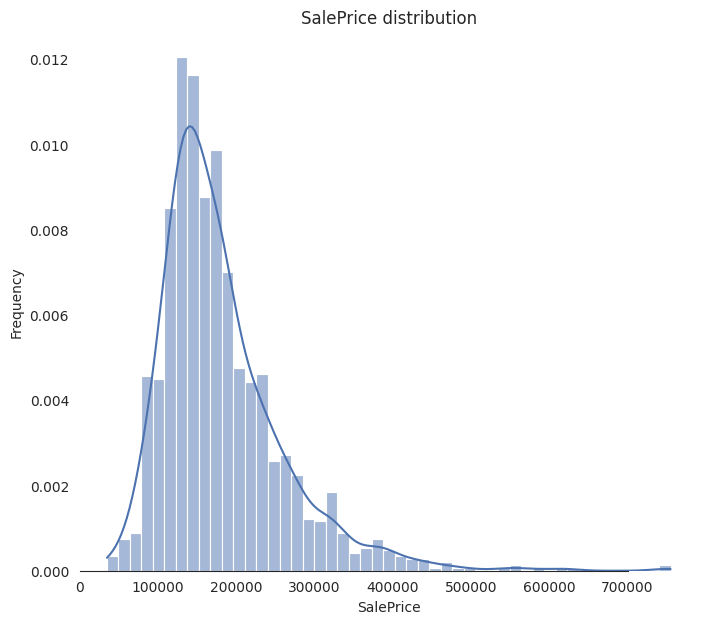

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#First let's check the skew on our SalePrice using a histogram
fig, ax, = plt.subplots(figsize=(8,7))
sns.histplot(train['SalePrice'],stat='frequency',kde=True,color="b")
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(title="SalePrice distribution")
sns.despine(trim=True,left=True)

#As well as print the skew and kursosis from the dataframe
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

In [ ]:
#Let's correct this skewness so we can have normally distributed data
train['SalePrice']=np.log1p(train['SalePrice'])

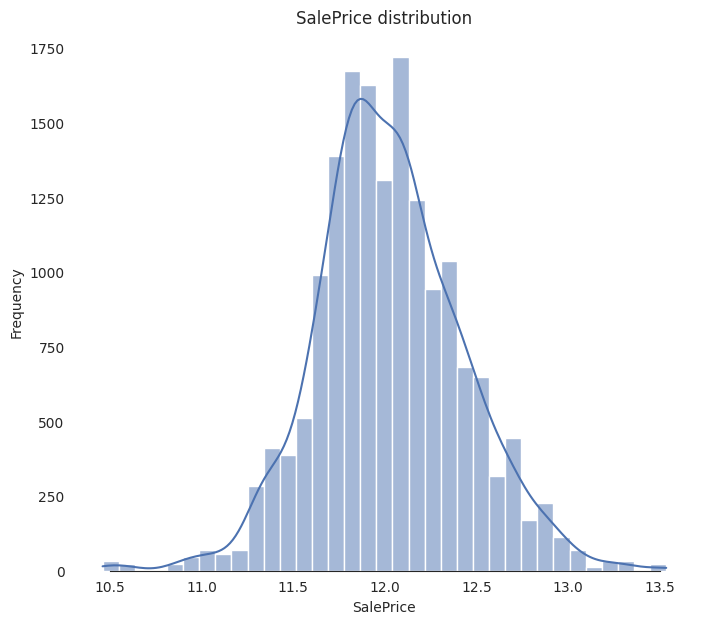

In [ ]:
from scipy import norm
fig, ax, = plt.subplots(figsize=(8,7))
sns.histplot(train['SalePrice'],stat='frequency',kde=True,color="b")
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(title="SalePrice distribution")
sns.despine(trim=True,left=True)